# Based on: [ "10 minutes to pandas"](https://pandas.pydata.org/docs/user_guide/10min.html)

In [1]:
import pandas as pd
import numpy as np

# 1. Object Creation

## 1.1 Creating a Series

You can create a `Series` from an **array-like**, **iterable**, `dict`, or **scalar** value.

In [2]:
# Create a Series from a list
l = [1, 2, 3, "a", "b", "c", "", np.nan]
series_from_list = pd.Series(l, name="series_from_list")

# Create a Series from a NumPy array:
arr = np.random.rand(8)
series_from_array = pd.Series(arr, name="series_from_array")

# Create a Series from a dict
d = dict(enumerate(l))
series_from_dict = pd.Series(d, name="series_from_dict")

# Create a Series from a scalar
series_from_scalar = pd.Series(1, name="scalar")

# Putting it all together for comparison
pd.concat(
    [series_from_list, series_from_array, series_from_dict, series_from_scalar],
    axis=1
)

,series_from_list,series_from_array,series_from_dict,scalar
0,1,0.803648,1,1.0
1,2,0.713452,2,NaN
2,3,0.179688,3,NaN
3,a,0.199981,a,NaN
4,b,0.802097,b,NaN
5,c,0.261891,c,NaN
6,,0.414026,,NaN
7,NaN,0.256770,NaN,NaN


## 1.2 Creating a Dataframe

You can create a `DataFrame` from an **ndarray**, **iterable** or `dict`.

In [3]:
# Create a DataFrame from a dict
df = pd.DataFrame(
    {
        "A": 1.,
        "B": pd.Timestamp("2021-06-24"),
        "C": pd.Series(np.random.rand(4), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train"] * 2),
        "F": "foo"
    },
)
df

,A,B,C,D,E,F
0,1.0,2021-06-24,0.590270,3,test,foo
1,1.0,2021-06-24,0.520827,3,train,foo
2,1.0,2021-06-24,0.194980,3,test,foo
3,1.0,2021-06-24,0.534584,3,train,foo


In [4]:
# Checking data types 
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [5]:
# Create a DataFrame from a NumPy array
df = pd.DataFrame(
    np.random.randn(8, 4),
    columns=list("ABCD"),
    index=pd.date_range("2021-06-24", periods=8)
) 
df

,A,B,C,D
2021-06-24,-0.195332,0.629033,-0.020756,0.597486
2021-06-25,-0.297687,-0.404748,0.383059,-0.072311
2021-06-26,0.238648,-0.722711,0.103561,-0.040572
2021-06-27,0.062060,-0.368959,-0.156691,0.822175
2021-06-28,-0.242857,0.129193,1.379451,0.204445
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961
2021-06-30,-1.322758,0.479851,0.728126,0.729849
2021-07-01,2.277214,-0.795513,-0.548959,0.199589


# 2. Viewing Data

In [6]:
# View the top n values
df.head(n=3)

,A,B,C,D
2021-06-24,-0.195332,0.629033,-0.020756,0.597486
2021-06-25,-0.297687,-0.404748,0.383059,-0.072311
2021-06-26,0.238648,-0.722711,0.103561,-0.040572


In [7]:
# View the bottom n values
df.tail()  # default n=5

,A,B,C,D
2021-06-27,0.062060,-0.368959,-0.156691,0.822175
2021-06-28,-0.242857,0.129193,1.379451,0.204445
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961
2021-06-30,-1.322758,0.479851,0.728126,0.729849
2021-07-01,2.277214,-0.795513,-0.548959,0.199589


In [8]:
# View the index
df.index

DatetimeIndex(['2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
               '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# View the columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [10]:
# Get summary statistics
df.describe()

,A,B,C,D
count,8.000000,8.000000,8.000000,8.000000
mean,-0.189103,-0.064640,0.089622,0.158713
std,1.255011,0.579703,0.772469,0.635136
min,-2.032116,-0.795513,-1.150812,-1.170961
25%,-0.553954,-0.484239,-0.254758,-0.048506
50%,-0.219094,-0.119883,0.041402,0.202017
75%,0.106207,0.494071,0.469325,0.630577
max,2.277214,0.629033,1.379451,0.822175


In [11]:
# Transpose a DataFrame
df.T

,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01
A,-0.195332,-0.297687,0.238648,0.062060,-0.242857,-2.032116,-1.322758,2.277214
B,0.629033,-0.404748,-0.722711,-0.368959,0.129193,0.536731,0.479851,-0.795513
C,-0.020756,0.383059,0.103561,-0.156691,1.379451,-1.150812,0.728126,-0.548959
D,0.597486,-0.072311,-0.040572,0.822175,0.204445,-1.170961,0.729849,0.199589


# 3. Sorting Data

### 3.1 Sort by axis

In [12]:
# Sort rows in descending order 
df.sort_index(ascending=False)  # default axis=0

,A,B,C,D
2021-07-01,2.277214,-0.795513,-0.548959,0.199589
2021-06-30,-1.322758,0.479851,0.728126,0.729849
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961
2021-06-28,-0.242857,0.129193,1.379451,0.204445
2021-06-27,0.062060,-0.368959,-0.156691,0.822175
2021-06-26,0.238648,-0.722711,0.103561,-0.040572
2021-06-25,-0.297687,-0.404748,0.383059,-0.072311
2021-06-24,-0.195332,0.629033,-0.020756,0.597486


In [13]:
# Sort columns in descending order
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-06-24,0.597486,-0.020756,0.629033,-0.195332
2021-06-25,-0.072311,0.383059,-0.404748,-0.297687
2021-06-26,-0.040572,0.103561,-0.722711,0.238648
2021-06-27,0.822175,-0.156691,-0.368959,0.062060
2021-06-28,0.204445,1.379451,0.129193,-0.242857
2021-06-29,-1.170961,-1.150812,0.536731,-2.032116
2021-06-30,0.729849,0.728126,0.479851,-1.322758
2021-07-01,0.199589,-0.548959,-0.795513,2.277214


### 3.2 Sort by value

In [14]:
# Sort rows in ascending order by values in column B
df.sort_values(by="B")  # default ascending=True

,A,B,C,D
2021-07-01,2.277214,-0.795513,-0.548959,0.199589
2021-06-26,0.238648,-0.722711,0.103561,-0.040572
2021-06-25,-0.297687,-0.404748,0.383059,-0.072311
2021-06-27,0.062060,-0.368959,-0.156691,0.822175
2021-06-28,-0.242857,0.129193,1.379451,0.204445
2021-06-30,-1.322758,0.479851,0.728126,0.729849
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961
2021-06-24,-0.195332,0.629033,-0.020756,0.597486


In [15]:
# Sort columns in descending order by values in row index "2021-06-25"
df.sort_values(by="2021-06-25", axis=1, ascending=False)

,C,D,A,B
2021-06-24,-0.020756,0.597486,-0.195332,0.629033
2021-06-25,0.383059,-0.072311,-0.297687,-0.404748
2021-06-26,0.103561,-0.040572,0.238648,-0.722711
2021-06-27,-0.156691,0.822175,0.062060,-0.368959
2021-06-28,1.379451,0.204445,-0.242857,0.129193
2021-06-29,-1.150812,-1.170961,-2.032116,0.536731
2021-06-30,0.728126,0.729849,-1.322758,0.479851
2021-07-01,-0.548959,0.199589,2.277214,-0.795513


# 4. Selection

### 4.1 Getting

In [16]:
# Get a column from a DataFrame (returns a Series)
df["A"]

2021-06-24   -0.195332
2021-06-25   -0.297687
2021-06-26    0.238648
2021-06-27    0.062060
2021-06-28   -0.242857
2021-06-29   -2.032116
2021-06-30   -1.322758
2021-07-01    2.277214
Freq: D, Name: A, dtype: float64

In [17]:
# Get a subset of the rows
df["2021-06-25":"2021-06-28"]

,A,B,C,D
2021-06-25,-0.297687,-0.404748,0.383059,-0.072311
2021-06-26,0.238648,-0.722711,0.103561,-0.040572
2021-06-27,0.062060,-0.368959,-0.156691,0.822175
2021-06-28,-0.242857,0.129193,1.379451,0.204445


### 4.2 Selection by label

In [18]:
# Select a row (cross section)
df.loc["2021-06-25"]

A   -0.297687
B   -0.404748
C    0.383059
D   -0.072311
Name: 2021-06-25 00:00:00, dtype: float64

In [19]:
# Select columns "A" and "C"
df.loc[:, ["A", "C"]]

,A,C
2021-06-24,-0.195332,-0.020756
2021-06-25,-0.297687,0.383059
2021-06-26,0.238648,0.103561
2021-06-27,0.062060,-0.156691
2021-06-28,-0.242857,1.379451
2021-06-29,-2.032116,-1.150812
2021-06-30,-1.322758,0.728126
2021-07-01,2.277214,-0.548959


In [20]:
# Multi-axis selection by label
df.loc["2021-06-28":"2021-06-30", ["B", "D"]]

,B,D
2021-06-28,0.129193,0.204445
2021-06-29,0.536731,-1.170961
2021-06-30,0.479851,0.729849


In [21]:
# Select a scalar value by label
df.at[pd.to_datetime("2021-06-29"), "B"]

0.5367313456782339

### 4.3 Selection by position

In [22]:
# Select the 3rd row (the index is zero-based: 0, 1, 2, 3, ...)
df.iloc[2]

A    0.238648
B   -0.722711
C    0.103561
D   -0.040572
Name: 2021-06-26 00:00:00, dtype: float64

In [23]:
# Multi-axis selection by position using slice notation
df.iloc[3:5, 2:4]

,C,D
2021-06-27,-0.156691,0.822175
2021-06-28,1.379451,0.204445


In [24]:
# Multi-axis selection by position using lists of indices
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-06-25,-0.297687,0.383059
2021-06-26,0.238648,0.103561
2021-06-28,-0.242857,1.379451


In [25]:
# Select a scalar value by position
df.iat[2, 2]

0.10356062626222534

### 4.4 Boolean indexing

In [26]:
# Select positive values
df[df > 0]

,A,B,C,D
2021-06-24,NaN,0.629033,NaN,0.597486
2021-06-25,NaN,NaN,0.383059,NaN
2021-06-26,0.238648,NaN,0.103561,NaN
2021-06-27,0.062060,NaN,NaN,0.822175
2021-06-28,NaN,0.129193,1.379451,0.204445
2021-06-29,NaN,0.536731,NaN,NaN
2021-06-30,NaN,0.479851,0.728126,0.729849
2021-07-01,2.277214,NaN,NaN,0.199589


In [27]:
# Select rows in which values in column "B" are positive
df[df["B"] > 0]

,A,B,C,D
2021-06-24,-0.195332,0.629033,-0.020756,0.597486
2021-06-28,-0.242857,0.129193,1.379451,0.204445
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961
2021-06-30,-1.322758,0.479851,0.728126,0.729849


In [28]:
# Add column "E"
df["E"] = ["one", "one", "two", "three", "four", "three", "two", "four"]

# Select using the isin() method
df[df["E"].isin(["two", "four"])]

,A,B,C,D,E
2021-06-26,0.238648,-0.722711,0.103561,-0.040572,two
2021-06-28,-0.242857,0.129193,1.379451,0.204445,four
2021-06-30,-1.322758,0.479851,0.728126,0.729849,two
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,four


### 4.5 Setting

In [29]:
# Set a new column "F"
df["F"] = range(1, 9)
df

,A,B,C,D,E,F
2021-06-24,-0.195332,0.629033,-0.020756,0.597486,one,1
2021-06-25,-0.297687,-0.404748,0.383059,-0.072311,one,2
2021-06-26,0.238648,-0.722711,0.103561,-0.040572,two,3
2021-06-27,0.062060,-0.368959,-0.156691,0.822175,three,4
2021-06-28,-0.242857,0.129193,1.379451,0.204445,four,5
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961,three,6
2021-06-30,-1.322758,0.479851,0.728126,0.729849,two,7
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,four,8


In [30]:
# Set new values for a column
df.loc[:, "E"] = df["E"].str.upper()
df

,A,B,C,D,E,F
2021-06-24,-0.195332,0.629033,-0.020756,0.597486,ONE,1
2021-06-25,-0.297687,-0.404748,0.383059,-0.072311,ONE,2
2021-06-26,0.238648,-0.722711,0.103561,-0.040572,TWO,3
2021-06-27,0.062060,-0.368959,-0.156691,0.822175,THREE,4
2021-06-28,-0.242857,0.129193,1.379451,0.204445,FOUR,5
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961,THREE,6
2021-06-30,-1.322758,0.479851,0.728126,0.729849,TWO,7
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,FOUR,8


In [31]:
# Set values by position
df.iat[2, 2] = 2200

# Set values by label
df.at["2021-06-26", "D"] = 2300

df

,A,B,C,D,E,F
2021-06-24,-0.195332,0.629033,-0.020756,0.597486,ONE,1
2021-06-25,-0.297687,-0.404748,0.383059,-0.072311,ONE,2
2021-06-26,0.238648,-0.722711,2200.000000,2300.000000,TWO,3
2021-06-27,0.062060,-0.368959,-0.156691,0.822175,THREE,4
2021-06-28,-0.242857,0.129193,1.379451,0.204445,FOUR,5
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961,THREE,6
2021-06-30,-1.322758,0.479851,0.728126,0.729849,TWO,7
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,FOUR,8


# 5. Missing Data

`pandas` primarily uses the value `np.nan` to represent *missing data*. It is by default not included in computations.

In [32]:
# Adding some NaN values (the default representation for missing data)
df.loc["2021-06-25":"2021-06-27", "A":"C"] = np.nan
df["G"] = np.nan
df

,A,B,C,D,E,F,G
2021-06-24,-0.195332,0.629033,-0.020756,0.597486,ONE,1,NaN
2021-06-25,NaN,NaN,NaN,-0.072311,ONE,2,NaN
2021-06-26,NaN,NaN,NaN,2300.000000,TWO,3,NaN
2021-06-27,NaN,NaN,NaN,0.822175,THREE,4,NaN
2021-06-28,-0.242857,0.129193,1.379451,0.204445,FOUR,5,NaN
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961,THREE,6,NaN
2021-06-30,-1.322758,0.479851,0.728126,0.729849,TWO,7,NaN
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,FOUR,8,NaN


### 5.1 Dropping missing data

In [33]:
# Drop rows missing values for columns "A" & "C"
df.dropna(subset=["A", "C"])  # default axis=0, how="any"

,A,B,C,D,E,F,G
2021-06-24,-0.195332,0.629033,-0.020756,0.597486,ONE,1,NaN
2021-06-28,-0.242857,0.129193,1.379451,0.204445,FOUR,5,NaN
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961,THREE,6,NaN
2021-06-30,-1.322758,0.479851,0.728126,0.729849,TWO,7,NaN
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,FOUR,8,NaN


In [34]:
# Drop empty columns
df.dropna(axis=1, how="all")

,A,B,C,D,E,F
2021-06-24,-0.195332,0.629033,-0.020756,0.597486,ONE,1
2021-06-25,NaN,NaN,NaN,-0.072311,ONE,2
2021-06-26,NaN,NaN,NaN,2300.000000,TWO,3
2021-06-27,NaN,NaN,NaN,0.822175,THREE,4
2021-06-28,-0.242857,0.129193,1.379451,0.204445,FOUR,5
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961,THREE,6
2021-06-30,-1.322758,0.479851,0.728126,0.729849,TWO,7
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,FOUR,8


### 5.2 Filling missing values

In [35]:
# Fill in missing values with a specific value
df.fillna(value=0.11111)

,A,B,C,D,E,F,G
2021-06-24,-0.195332,0.629033,-0.020756,0.597486,ONE,1,0.11111
2021-06-25,0.111110,0.111110,0.111110,-0.072311,ONE,2,0.11111
2021-06-26,0.111110,0.111110,0.111110,2300.000000,TWO,3,0.11111
2021-06-27,0.111110,0.111110,0.111110,0.822175,THREE,4,0.11111
2021-06-28,-0.242857,0.129193,1.379451,0.204445,FOUR,5,0.11111
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961,THREE,6,0.11111
2021-06-30,-1.322758,0.479851,0.728126,0.729849,TWO,7,0.11111
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,FOUR,8,0.11111


In [36]:
# Use back-filling
df.fillna(method="bfill")  # "ffill" for forward-filling

,A,B,C,D,E,F,G
2021-06-24,-0.195332,0.629033,-0.020756,0.597486,ONE,1,NaN
2021-06-25,-0.242857,0.129193,1.379451,-0.072311,ONE,2,NaN
2021-06-26,-0.242857,0.129193,1.379451,2300.000000,TWO,3,NaN
2021-06-27,-0.242857,0.129193,1.379451,0.822175,THREE,4,NaN
2021-06-28,-0.242857,0.129193,1.379451,0.204445,FOUR,5,NaN
2021-06-29,-2.032116,0.536731,-1.150812,-1.170961,THREE,6,NaN
2021-06-30,-1.322758,0.479851,0.728126,0.729849,TWO,7,NaN
2021-07-01,2.277214,-0.795513,-0.548959,0.199589,FOUR,8,NaN


In [37]:
# Get the boolean mask where values are NaN
df.isna()

,A,B,C,D,E,F,G
2021-06-24,False,False,False,False,False,False,True
2021-06-25,True,True,True,False,False,False,True
2021-06-26,True,True,True,False,False,False,True
2021-06-27,True,True,True,False,False,False,True
2021-06-28,False,False,False,False,False,False,True
2021-06-29,False,False,False,False,False,False,True
2021-06-30,False,False,False,False,False,False,True
2021-07-01,False,False,False,False,False,False,True


In [38]:
# Get the boolean mask where values are present
df.notna()

,A,B,C,D,E,F,G
2021-06-24,True,True,True,True,True,True,False
2021-06-25,False,False,False,True,True,True,False
2021-06-26,False,False,False,True,True,True,False
2021-06-27,False,False,False,True,True,True,False
2021-06-28,True,True,True,True,True,True,False
2021-06-29,True,True,True,True,True,True,False
2021-06-30,True,True,True,True,True,True,False
2021-07-01,True,True,True,True,True,True,False


In [39]:
# Get the number of missing values in each column
df.isna().sum()

A    3
B    3
C    3
D    0
E    0
F    0
G    8
dtype: int64

# 6. Operations

### 6.1 Stats

In [40]:
df = pd.DataFrame(np.random.randn(5, 4), columns=list("ABCD"))
df

,A,B,C,D
0,-1.015002,0.950140,-0.127294,-1.770750
1,0.544877,-1.141542,1.027730,-0.726888
2,0.596489,1.097522,2.065375,1.268897
3,-1.186664,0.695666,-1.536934,-0.106787
4,0.422481,0.149638,1.456235,0.790494


In [41]:
# Get the mean for each column
df.mean()  # default axis=0

A   -0.127564
B    0.350285
C    0.577023
D   -0.109007
dtype: float64

In [42]:
# Get the mean for each row
df.mean(axis=1)

0   -0.490727
1   -0.073956
2    1.257071
3   -0.533680
4    0.704712
dtype: float64

In [43]:
# Get the correlation for columns
df.corr(method="spearman")

,A,B,C,D
A,1.0,0.1,0.9,0.5
B,0.1,1.0,0.2,0.3
C,0.9,0.2,1.0,0.7
D,0.5,0.3,0.7,1.0


### 6.2 Apply

In [44]:
# Run np.var on each column"s values
df.apply(np.var)  # == df.var()

A    0.637644
B    0.660657
C    1.631244
D    1.170179
dtype: float64

In [45]:
# Get the range for each column
df.apply(lambda x: x.max() - x.min())

A    1.783153
B    2.239064
C    3.602309
D    3.039647
dtype: float64

In [46]:
# Convert the rows into sets
df.apply(set, axis=1)

0    {0.9501397723866285, -0.12729434668576592, -1....
1    {0.5448766812667056, 1.0277304064660249, -0.72...
2    {0.5964886347773223, 1.097521695563295, 2.0653...
3    {0.695665876325359, -0.10678654912963903, -1.5...
4    {0.4224810685366243, 1.456235477391314, 0.7904...
dtype: object

### 6.3 Histogramming

In [47]:
s = pd.Series(list("abcdababdadkankz"))
s.value_counts()

a    5
b    3
d    3
k    2
c    1
n    1
z    1
dtype: int64

### 6.4 String methods

In [48]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.title()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [49]:
s.str.swapcase()

0       a
1       b
2       c
3    aABA
4    bACA
5     NaN
6    caba
7     DOG
8     CAT
dtype: object

# 7. Merge

### 7.1 Concat

In [50]:
df = pd.DataFrame(
    np.random.randn(8, 4), columns=["1st", "2nd", "3rd", "4th"]
)

# Get 3 chunks of the dataframe
df1, df2, df3 = [df[:3], df[3:7], df[7:]]
print(df1, df2, df3, sep="\n\n")

        1st       2nd       3rd       4th
0 -0.827039 -0.241092 -0.367765  0.971509
1 -0.530194 -0.486519 -1.960813 -0.014701
2 -0.269639 -0.135444  0.317892 -1.354157

        1st       2nd       3rd       4th
3  0.166607 -0.718460  1.847594 -0.693282
4  2.116287  1.817195  1.251735 -0.059792
5  1.107559  1.148983 -1.042514 -0.862331
6 -1.905414 -1.707020  0.863534  0.916910

        1st       2nd      3rd       4th
7  0.549218  0.011605 -0.03939  0.072101


In [51]:
# Concatinate the 3 chunks 
df_concat = pd.concat([df1, df2, df3])

# Check if the result is equal to df
df_concat.equals(df)

True

In [52]:
# Concatinate column-wise
s = pd.Series(range(8), name="5th")
df2 = pd.DataFrame(np.random.randn(8, 2), columns=["6th", "7th"])
pd.concat([df, s, df2], axis=1)

,1st,2nd,3rd,4th,5th,6th,7th
0,-0.827039,-0.241092,-0.367765,0.971509,0,-0.061923,-0.634925
1,-0.530194,-0.486519,-1.960813,-0.014701,1,-0.346868,1.249871
2,-0.269639,-0.135444,0.317892,-1.354157,2,-0.384880,-0.972618
3,0.166607,-0.718460,1.847594,-0.693282,3,0.719793,1.294815
4,2.116287,1.817195,1.251735,-0.059792,4,-0.374110,-1.319213
5,1.107559,1.148983,-1.042514,-0.862331,5,-2.770606,-0.126616
6,-1.905414,-1.707020,0.863534,0.916910,6,0.281555,-1.470017
7,0.549218,0.011605,-0.039390,0.072101,7,0.843820,-1.028473


### 7.2 Join

SQL-style merges

In [53]:
left = pd.DataFrame(
    {
        "key": ["foo", "bar", "baz"],
        "lval": [0, 1, 2]
    }
)
left

,key,lval
0,foo,0
1,bar,1
2,baz,2


In [54]:
right = pd.DataFrame(
    {
        "key": ["foo", "bar"],
        "rval": [3, 4]
    }
)
right

,key,rval
0,foo,3
1,bar,4


In [55]:
# Perform an inner join (default how="inner")
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,0,3
1,bar,1,4


In [56]:
# Perform a left join
left.merge(right, how="left", on="key")

,key,lval,rval
0,foo,0,3.0
1,bar,1,4.0
2,baz,2,NaN


# 8. Grouping

Here, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [57]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar"],
        "B": ["one", "one", "two", "three", "two", "two"],
        "C": np.random.randn(6),
        "D": np.random.randn(6)
    }
)
df

,A,B,C,D
0,foo,one,-0.648891,0.596924
1,bar,one,2.127764,0.216798
2,foo,two,1.461984,-0.175816
3,bar,three,-0.989809,-0.194081
4,foo,two,-0.267613,-0.493215
5,bar,two,0.074497,0.052018


In [58]:
# Group by column "B" values and find the sum for each group
df.groupby("B").sum(numeric_only=True)

,C,D
B,,
one,1.478873,0.813722
three,-0.989809,-0.194081
two,1.268868,-0.617013


In [59]:
# Group by columns "A" & "B" and find the mean for each group
df.groupby(["A", "B"]).mean(numeric_only=True)

C         D
A   B                        
bar one    2.127764  0.216798
    three -0.989809 -0.194081
    two    0.074497  0.052018
foo one   -0.648891  0.596924
    two    0.597186 -0.334515

# 9. Reshaping

### 9.1 Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [60]:
multi_index = pd.MultiIndex.from_product([[1, 2, 3], ["A", "B", "C"]])
df = pd.DataFrame(
    np.random.randn(9, 2), index=multi_index, columns=["col-1", "col-2"]
)
df

col-1     col-2
1 A -1.310290 -1.463075
  B -1.392804 -0.248132
  C -0.929655 -1.295029
2 A -1.148176 -1.139852
  B -0.438804  0.041735
  C -0.240252 -0.075431
3 A -0.324990 -1.821486
  B  0.335243 -1.015368
  C -1.915235 -0.337306

In [61]:
df.stack()  # The columns become part of the MultiIndex

1  A  col-1   -1.310290
      col-2   -1.463075
   B  col-1   -1.392804
      col-2   -0.248132
   C  col-1   -0.929655
      col-2   -1.295029
2  A  col-1   -1.148176
      col-2   -1.139852
   B  col-1   -0.438804
      col-2    0.041735
   C  col-1   -0.240252
      col-2   -0.075431
3  A  col-1   -0.324990
      col-2   -1.821486
   B  col-1    0.335243
      col-2   -1.015368
   C  col-1   -1.915235
      col-2   -0.337306
dtype: float64

In [62]:
df.unstack(level=0)  # The 1st index level becomes a column level

col-1                         col-2                    
          1         2         3         1         2         3
A -1.310290 -1.148176 -0.324990 -1.463075 -1.139852 -1.821486
B -1.392804 -0.438804  0.335243 -0.248132  0.041735 -1.015368
C -0.929655 -0.240252 -1.915235 -1.295029 -0.075431 -0.337306

In [63]:
df.unstack(level=1)  # The 2nd index level becomes a column level

col-1                         col-2                    
          A         B         C         A         B         C
1 -1.310290 -1.392804 -0.929655 -1.463075 -0.248132 -1.295029
2 -1.148176 -0.438804 -0.240252 -1.139852  0.041735 -0.075431
3 -0.324990  0.335243 -1.915235 -1.821486 -1.015368 -0.337306

### 9.2 Pivot tables

In [64]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12)
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.699153,-0.740203
1,one,B,foo,1.448087,-0.674575
2,two,C,foo,0.094581,0.754725
3,three,A,bar,-1.372713,-0.179543
4,one,B,bar,1.584353,0.086447
5,one,C,bar,0.021087,-1.135426
6,two,A,foo,0.594770,-0.260443
7,three,B,foo,0.371876,1.451358
8,one,C,foo,-1.428020,-0.121874
9,one,A,bar,0.400637,0.551257


In [65]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.400637  0.699153
      B  1.584353  1.448087
      C  0.021087 -1.428020
three A -1.372713       NaN
      B       NaN  0.371876
      C -0.413404       NaN
two   A       NaN  0.594770
      B -1.028369       NaN
      C       NaN  0.094581

In [66]:
df.pivot(index="A", columns=["C", "B"], values="E")

C           foo                           bar                    
B             A         B         C         A         B         C
A                                                                
one   -0.740203 -0.674575 -0.121874  0.551257  0.086447 -1.135426
three       NaN  1.451358       NaN -0.179543       NaN  0.694480
two   -0.260443       NaN  0.754725       NaN -0.842497       NaN

# 10. Time Series

In [67]:
ts = pd.Series(
    np.random.rand(500) * 1e3,
    index=pd.date_range("1/1/2020", periods=500, freq="D"),
    name="monthly-foo"
)
ts.head()

2020-01-01     32.859587
2020-01-02    867.723113
2020-01-03    264.347100
2020-01-04    619.765242
2020-01-05    777.546936
Freq: D, Name: monthly-foo, dtype: float64

In [68]:
ts.resample("1W").mean()  # get weekly averages

2020-01-05    512.448396
2020-01-12    359.628958
2020-01-19    530.478268
2020-01-26    673.771644
2020-02-02    318.479005
                 ...    
2021-04-18    498.533901
2021-04-25    427.982082
2021-05-02    460.307016
2021-05-09    514.359065
2021-05-16    334.914165
Freq: W-SUN, Name: monthly-foo, Length: 72, dtype: float64

In [69]:
ts.resample("Q").sum()  # get totals for every quarter(3 months)

2020-03-31    41130.429908
2020-06-30    44814.391526
2020-09-30    41445.824177
2020-12-31    50671.911408
2021-03-31    44379.214345
2021-06-30    19903.308080
Freq: Q-DEC, Name: monthly-foo, dtype: float64

In [70]:
# Set time zone
ts_utc = ts.tz_localize("UTC")
ts_utc.head()

2020-01-01 00:00:00+00:00     32.859587
2020-01-02 00:00:00+00:00    867.723113
2020-01-03 00:00:00+00:00    264.347100
2020-01-04 00:00:00+00:00    619.765242
2020-01-05 00:00:00+00:00    777.546936
Freq: D, Name: monthly-foo, dtype: float64

In [71]:
# Convert to another time zone
ts_utc.tz_convert("Africa/Nairobi").head()

2020-01-01 03:00:00+03:00     32.859587
2020-01-02 03:00:00+03:00    867.723113
2020-01-03 03:00:00+03:00    264.347100
2020-01-04 03:00:00+03:00    619.765242
2020-01-05 03:00:00+03:00    777.546936
Freq: D, Name: monthly-foo, dtype: float64

# 11. Categoricals

In [72]:
df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6],
        "grade": ["a", "b", "b", "a", "a", "e"]
    }
)
df["grade"] = df["grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [73]:
# Give the categories more meaningful names
df["grade"] = df["grade"].cat.rename_categories(["very good", "good", "very bad"])

In [74]:
# You can sort by category
df.sort_values(by="grade")

,id,grade
0,1,very good
3,4,very good
4,5,very good
1,2,good
2,3,good
5,6,very bad


In [75]:
# You can include empty categories
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df.groupby("grade").count()

,id
grade,
very bad,1
bad,0
medium,0
good,2
very good,3


# 12. Plotting

<AxesSubplot: >

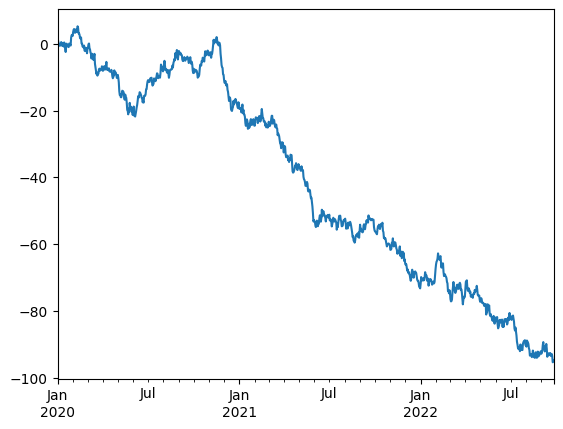

In [76]:
ts = pd.Series(
    np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000)
)
ts.cumsum().plot()

<AxesSubplot: >

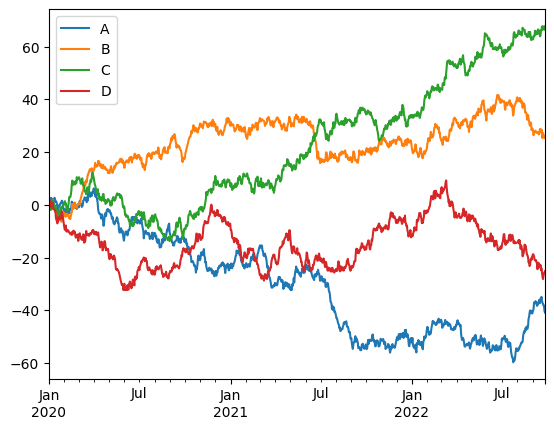

In [77]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df.cumsum().plot()

<AxesSubplot: ylabel='Density'>

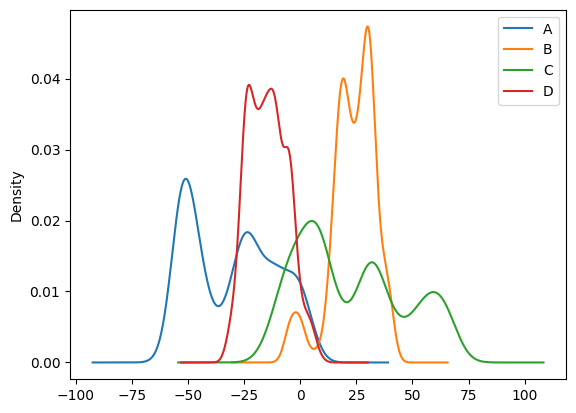

In [78]:
df.cumsum().plot(kind="kde")

# 13. Importing / Exporting Data

### CSV

In [79]:
# Writing to a csv file
df.to_csv("../data/data.csv")

In [80]:
# Reading from a csv file
pd.read_csv("../data/data.csv", index_col=0).head()

,A,B,C,D
2020-01-01,0.837153,0.591656,-0.112782,0.627967
2020-01-02,-0.448244,0.056442,0.436022,-0.300099
2020-01-03,1.328923,-0.722010,-0.940309,0.712122
2020-01-04,0.592100,-0.534090,-1.308541,0.363060
2020-01-05,0.358152,0.232978,0.118594,-0.626662


### Excel

In [81]:
# Writing to an excel file
df.to_excel("../data/data.xlsx", sheet_name="Sheet1")

In [82]:
# Reading from an excel file
pd.read_excel("../data/data.xlsx", sheet_name="Sheet1", index_col=0).head()

,A,B,C,D
2020-01-01,0.837153,0.591656,-0.112782,0.627967
2020-01-02,-0.448244,0.056442,0.436022,-0.300099
2020-01-03,1.328923,-0.722010,-0.940309,0.712122
2020-01-04,0.592100,-0.534090,-1.308541,0.363060
2020-01-05,0.358152,0.232978,0.118594,-0.626662


### HDF5

In [83]:
# Writing to a HDF5 Store
df.to_hdf("../data/data.h5", "df")

In [84]:
# Reading from a HDF5 Store 
pd.read_hdf("../data/data.h5", "df").head()

,A,B,C,D
2020-01-01,0.837153,0.591656,-0.112782,0.627967
2020-01-02,-0.448244,0.056442,0.436022,-0.300099
2020-01-03,1.328923,-0.722010,-0.940309,0.712122
2020-01-04,0.592100,-0.534090,-1.308541,0.363060
2020-01-05,0.358152,0.232978,0.118594,-0.626662
